<a href="https://colab.research.google.com/github/aime-n/ic/blob/main/GCN_link_prediction_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link prediction with GCN

---

We'll use a Graph Convolutional Network (GCN) algorithm to build a model that predicts links in a 

- supervised link prediction
- homogeneous network


## GCN implementation with matrix adjacency as feature

### Knowledge Graph

#### Libraries and functions for KG

In [177]:
!git clone https://github.com/HaoWeiHe/Knowledge-Graph

fatal: destination path 'Knowledge-Graph' already exists and is not an empty directory.


In [178]:
mv ./Knowledge-Graph/* .

mv: cannot stat './Knowledge-Graph/*': No such file or directory


In [179]:
from knowledgeGraph import get_entity
from knowledgeGraph import get_relation

- get_entity: <br>
Noun related tags (subject/object)
- get_relation: <br>
Dependency between them (predicate) <br><br>
Ex:


Entities: ('milky way', 'spiral arms')
Relation: have


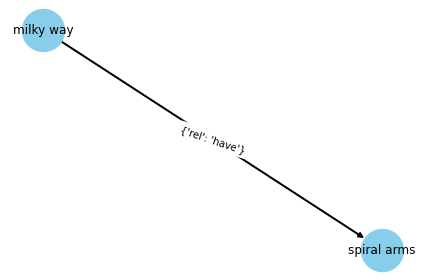

In [180]:
from knowledgeGraph import show
text = '''
The milky way has spiral arms'''
entities = get_entity(text)
rel = get_relation(text)
print(f'Entities: {entities}')
print(f'Relation: {rel}')
show(text)

In [181]:
# !pip install -q spacy==3.2 #NLP library

In [182]:
import pandas as pd

In [183]:
import nltk # Natural Language ToolKit
from nltk.tokenize import sent_tokenize # sentence tokenizer
nltk.download('punkt')
import networkx as nx # graph lib
from tqdm.notebook import tqdm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- sent_tokenize: <br>
It splits the text into sentences. <br> <br>
Ex: 

In [184]:
text = '''How happy is the blameless vestal's lot!
The world forgetting, by the world forgot.
Eternal sunshine of the spotless mind!
Each pray'r accepted, and each wish resign'd; '''

for sentence in sent_tokenize(text):
  print('-->', sentence)

--> How happy is the blameless vestal's lot!
--> The world forgetting, by the world forgot.
--> Eternal sunshine of the spotless mind!
--> Each pray'r accepted, and each wish resign'd;


#### Original Data

In [185]:
ground_truth = pd.read_csv('https://raw.githubusercontent.com/aime-n/ic/main/Ground_truth.csv')
ground_truth.head()

,App id,Review id,Sentence id,Sentence content,Feature (Positive),Feature (Neutral),Feature (Negative),Feature (All Annotated)
0,com.zentertain.photoeditor,gp:AOqpTOEW40L9WXqCjzq04bqaZImgMdzlczxIF3_ibs8...,1,May be i can check,NaN,NaN,NaN,NaN
1,com.zentertain.photoeditor,gp:AOqpTOF57AQPvmnCiWYurwLY-F2-mej25ON8RAFk-Ls...,1,It make me happy,NaN,NaN,NaN,NaN
2,com.zentertain.photoeditor,gp:AOqpTOHYdmt72q4tSD8TZ8A5fZQqGivlBkIbWuHuJMZ...,1,I have a normal phone and it made 1 of my pics...,NaN,pics,NaN,pics
3,com.zentertain.photoeditor,gp:AOqpTOFYnXMShrDJPS0jpM04pFQxYOJN1LDuX3lSNm0...,1,Love it so much,NaN,NaN,NaN,NaN
4,com.zentertain.photoeditor,gp:AOqpTOF_JO496wnThQ2kcYlPct_g1GhOmQyyVvHp4VV...,1,Cant get to install,NaN,install,NaN,install


#### Creation of KG

In [186]:
KG = nx.Graph()
# index_l = []

i = 0
for review in tqdm(ground_truth['Sentence content']): 
  # tqdm => progress bar
  for sentence in sent_tokenize(review):
    if i < 30:
      print(f'--> {sentence}')

    nodes = get_entity(sentence) # (subject, object)
    sub, obj = nodes[0], nodes[1]

    rel = get_relation(sentence) # predicate

    # ignore less than 2 letter words
    if len(sub) > 2 and len(obj) > 2 and len(rel) > 2:
      # show(sentence)
      if i < 30:
        print(f'subject: {sub}\nrelation: {rel}\nobject: {obj}')
      # index_l.append(i)
      KG.add_edge(sub, obj, relation=rel)
  i+=1

  0%|          | 0/2062 [00:00<?, ?it/s]

--> May be i can check
--> It make me happy
--> I have a normal phone and it made 1 of my pics look like one of a iphone 6 if u dont believe me look at my instagran account ... wings_2004
--> Love it so much
--> Cant get to install
--> Too many ads and secondly erratic interface.
--> I have already uninstalled
--> Its so happy
--> Nicest systematic for Android phones
--> Its so easy and fun
--> Main diss app tight um hmmm
--> Everything is awesome
--> I've downloaded a few different ones and this is easy to use, and the pictures come out great.
subject: pictures
relation: download
object: a few different ones
--> Plenty of options to choose from to make whatever kind of picture you would like
subject: you
relation: plenty
object: picture
--> Like it but not so cool app
--> I really like the HD effect, brightness and color correction features.
--> I can basically change the whole pic   its so cool :-) lol :-)
--> I can't  believe  how easy  it is.
--> This app is very good for photos ed

In [187]:
for i in list(KG.edges(data=True))[:10]:
  print(i)

('pictures', 'a few different ones', {'relation': 'download'})
('pictures', 'news feed', {'relation': 'have'})
('you', 'picture', {'relation': 'plenty'})
('you', 'when i', {'relation': 'run'})
('you', 'rubbish apps', {'relation': 'have'})
('you', 'buttom', {'relation': 'sync'})
('you', 'anything', {'relation': 'have'})
('you', 'kindle fire', {'relation': 'beat'})
('you', 'in little app', {'relation': 'keep'})
('you', 'They', {'relation': 'locate'})


In [188]:
for i in list(nx.connected_components(KG))[:10]:
  print(i)

{'pictures', 'a few different ones', 'news feed'}
{'netflix account', 'item', 'Disappointed', 'kindle fire', 'that', 'other social medias', 'really me', 'consent', 'pretty much WHATEVER', 'Now it', 'web when version', 'everything', 'other wireless devices', 'YOU', 'What', 'opinion', 'new bids', 'where I', 'where wifi', 'Beta also tablets', 'important notes', 'also go', 'They', 'when i', 'similar ones', 'whatever', 'tablet', 'how it', 'contacts', 'connection', 'application', 'even reviews', 'w/ pics', 'just enternet', 'very well me', 'just what', 'sony this', 'Hopefully it', 'others', 'FB phone compelling app', 'issue', 'someone', 'all', 'other reviewers', 'what', 'laptop', 'computer', 'connection error', 'just songs', 'wherever you', 'updates', 'place', 'little more updated movies', '# 34;go information', 'ebay store', 'buttom', 'pants', 'really I', 'NEW movies', 'different speeds', 'earlier version', 'friends', 'newsfeed', 'Kindle device', 'just device', 'great you', 'something', 'fam

In [189]:
print(f'Number of nodes: {len(KG.nodes)}')
print(f'Number of edges: {len(KG.edges)}')

Number of nodes: 613
Number of edges: 461


#### KG Visualization

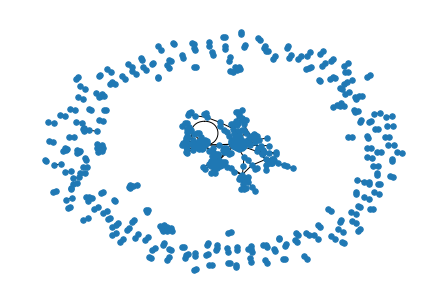

In [190]:
nx.draw(KG, node_size=30)

A closer look.<br>
Drawing only the biggest chunk of connected nodes for visualization purpose

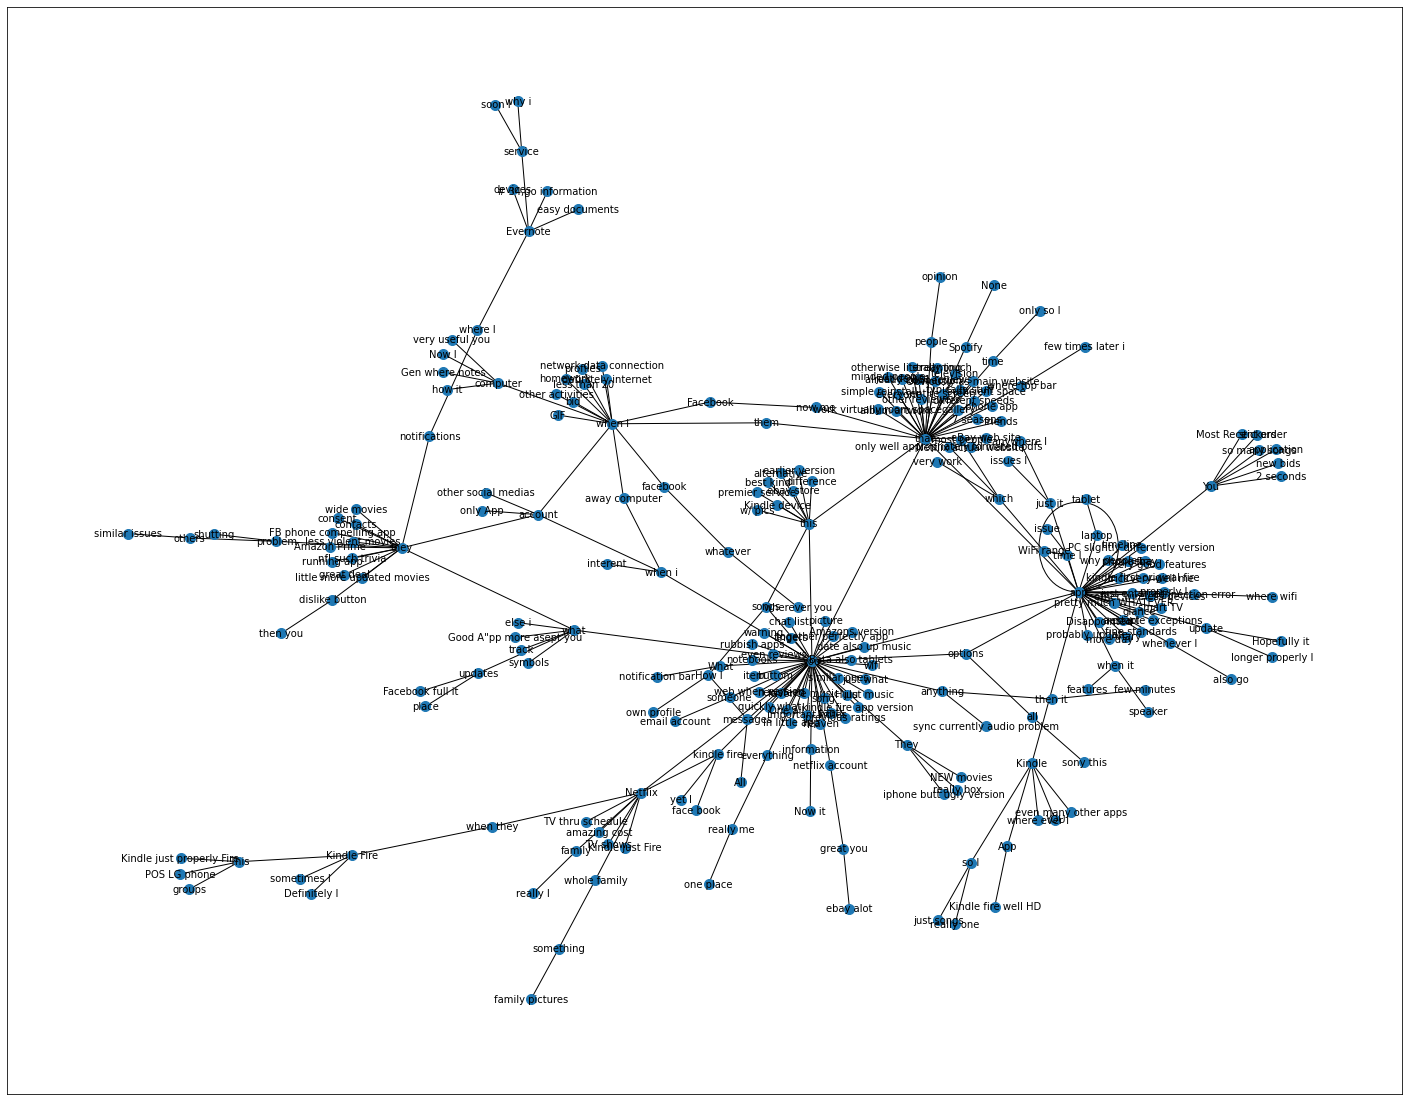

In [191]:
import matplotlib.pyplot as plt
gcc = (max(nx.connected_components(KG), key=len)) # giant connected component
subgraph = KG.subgraph(gcc)
options = {
    "font_size": 10,
    "node_size": 100,
}

plt.figure(figsize=(25,20)) 
nx.draw_networkx(subgraph, **options)
plt.show()

#### Creation of DataFrame of edges

In [192]:
df_edges_linguistic = pd.DataFrame()

source, target, relation = [], [], []
for edge in KG.edges(data=True):
  source.append(edge[0])
  target.append(edge[1])
  relation.append(edge[2]['relation'])

df_edges_linguistic['source'] = source
df_edges_linguistic['relation'] = relation
df_edges_linguistic['target'] = target

print(f'Length of df edges linguistic: {len(df_edges_linguistic)}')
df_edges_linguistic.head()

Length of df edges linguistic: 461


,source,relation,target
0,pictures,download,a few different ones
1,pictures,have,news feed
2,you,plenty,picture
3,you,run,when i
4,you,have,rubbish apps


#### Matrix adjacency

In [193]:
adj_matrix = nx.adjacency_matrix(KG).todense()
print(adj_matrix.shape) # len(nodes) x len(nodes)
print(f'Is the length the same as the KG.nodes? {len(KG.nodes) == len(adj_matrix)}')

(613, 613)
Is the length the same as the KG.nodes? True


In [194]:
df_adj_matrix = pd.DataFrame(adj_matrix)

df_adj_matrix['index'] = list(KG.nodes)
df_adj_matrix.set_index('index', inplace=True)
df_adj_matrix.columns = list(KG.nodes)

print(f'Matrix shape: {df_adj_matrix.shape}')

df_adj_matrix.head()

Matrix shape: (613, 613)


,pictures,a few different ones,you,picture,focus work.plz,samsung galaxy recntly a5,Its,things,editing many options,photo editing,super i,effects,app,very good features,You,best lot it,photo editing so many tools,First why you,phone,when i,They,really box,few that,5 stars,that,gallery,frames,picture enhanced qualities,Aviary,Sud,un blur photos,always so yea,3 app,nice cn,overall good job,why I,stickers,rubbish apps,Hope,trouble,trick,Especially it,well others,at least it,Microsoft as OneNote,buttom,anything,app store,sadly it,their,well pc,note,needs,work,websites,other wireless devices,now me,this,best kind,note slick store really me,head,notes,kindle,kindle fire,in little app,they,contacts,account,first place,once again devices,copy,laptop,pants,how it,computer,none,very only minor drawbacks,So where you,multiple devices,Gen where notes,shear number,limited 60 MB,service,Evernote,most users,quota,how this,Kindle Fire HD,Instead PDFs,attachments,which,only well appropriately formated pdfs,Nov Thursday 8th ]Evernote,reviewers,# 34;go information,really me,everything,important notes,always I,electronic,how you,check boxes,one place,app how syncs,so I,really one,very useful you,just then Evernote,so far day,list,do&quot,use,iphone butt ugly version,so far it,freehand pretty much you,just notes,Evernote excels,companion sheer apps,when I,less than 20,Overall Evernote,note category,together perfectly app,devices,other that,excellent computer,updates,place,writer,fancy just what,else it,share just anything,work virtually room space,bluetooth keyboard,kindle fire cleanly hd,App,Kindle,already 2131 reviews,songs,pretty much WHATEVER,simple reinstall,where I,why you,Honestly it,Great that,life organization,Grateful I,finally it,easy documents,homework,photos,audio,notebooks,else i,what,notifications,phone model,own settings,myself,desktop,tablet,now I,Kindle device,Of course you,Ebay,just size,iphone,Now I,away computer,error message,eBay Bucks,instead site,where ever I,only so I,time,glance,just enternet,lot only it,ill 5 stars,bid,new bids,who,great deals,phone app,anywhere I,just it,eBay web site,time I,WiFi range,phone fire,mobile version,full site,example,Obviously as main website,format,Android very phone,Amazons version,ebay,wifi,great you,ebay alot,Kindle fire well HD,track,problem,application,iPhone where app,android phone,payment,purchase,ebay store,Glad they,android platform,What,free other prices,kind of ebay,item,007 bad guy,very convincing part,amazon,similar app,users,personal profile,way he,hotel,PC slightly differently version,though which,lot,apps,quick great all,earlier version,time Good I,when buyer potential buyer,question,options,too much white,eyes,feature,phone moto,Works,system,2011 it,whtsap,calling option,possible method,dude n ho,songs videos n pictures,Snapchat Viber Facebook,whatsapp,sufficient space,close it,wanna,i m,chat grps,even reviews,name,always numbers,when you,voice message screen,soo you,ear piece,Calling,voice,lags,profile picture,Why I,All,messages,where wifi,connection error,"Good A""pp more asept you",sometimes it,htc mobile,SMS i,still WhatsApp,chat list,Now it,information,people,more it,eagerly it,Permission,instead itself,perfectly plenty money,one,then it,few minutes,wide movies,yet I,tht,red better box,basically user,movie,why i,7 seasons,too they,only 1 season,soon I,periodically rather then them,movies,sometimes I,Kindle Fire,later then it,only sound,Netflix,streaming,when they,fingers,One all,less violent movies,Amazon Prime,again why I,login then timeout,other reviewers,very well me,NEW movies,course,kindle fire app version,amazing cost,family,where ever you,netflix,fire.you,it.trust me,her,perfectly now they,screen,had,great deal great movie,a couple exceptions,netflix account,15 we,story very fine lines,little more updated movies,less sex,good,great deal,fine Netflix,much,them,Hulu,This,whole family,something,services,about same movies,Overall best now that,t.v,exceptthey,latest 

#### Building StellarGraph

In [230]:
G_adj = sg.StellarGraph(df_adj_matrix, df_edges_linguistic[['source', 'target']])

In [231]:
print(G_adj.info())

StellarGraph: Undirected multigraph
 Nodes: 613, Edges: 461

 Node types:
  default: [613]
    Features: float32 vector, length 613
    Edge types: default-default->default

 Edge types:
    default-default->default: [461]
        Weights: all 1 (default)
        Features: none


### GCN implementation

#### Importing libraries for GCN

In [196]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

In [197]:
import stellargraph as sg

In [198]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

#### GCN algorithm

In [232]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(G_adj)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=False, seed=42)

** Sampled 46 positive and 46 negative edges. **


In [233]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=False, seed=42
)

** Sampled 41 positive and 41 negative edges. **


In [234]:
epochs = 50

In [235]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [236]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [237]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.3
)

In [238]:
x_inp, x_out = gcn.in_out_tensors()

In [239]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

In [240]:
prediction = keras.layers.Reshape((-1,))(prediction)

In [241]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=["binary_accuracy"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [242]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 52ms/step - loss: 2.6178 - binary_accuracy: 0.5000

Train Set Metrics of the initial (untrained) model:
	loss: 2.6336
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 2.6178
	binary_accuracy: 0.5000


In [243]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/50
1/1 - 1s - loss: 4.5432 - binary_accuracy: 0.5000 - val_loss: 1.8989 - val_binary_accuracy: 0.5000 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.9462 - binary_accuracy: 0.5000 - val_loss: 1.4201 - val_binary_accuracy: 0.5000 - 65ms/epoch - 65ms/step
Epoch 3/50
1/1 - 0s - loss: 1.3781 - binary_accuracy: 0.5122 - val_loss: 1.0758 - val_binary_accuracy: 0.5326 - 66ms/epoch - 66ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9958 - binary_accuracy: 0.5366 - val_loss: 0.8281 - val_binary_accuracy: 0.6739 - 70ms/epoch - 70ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8149 - binary_accuracy: 0.6220 - val_loss: 0.6974 - val_binary_accuracy: 0.6522 - 74ms/epoch - 74ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6312 - binary_accuracy: 0.6585 - val_loss: 0.6702 - val_binary_accuracy: 0.6413 - 72ms/epoch - 72ms/step
Epoch 7/50
1/1 - 0s - loss: 0.5207 - binary_accuracy: 0.6951 - val_loss: 1.1232 - val_binary_accuracy: 0.5870 - 82ms/epoch - 82ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6390 - binary_accuracy: 0.768

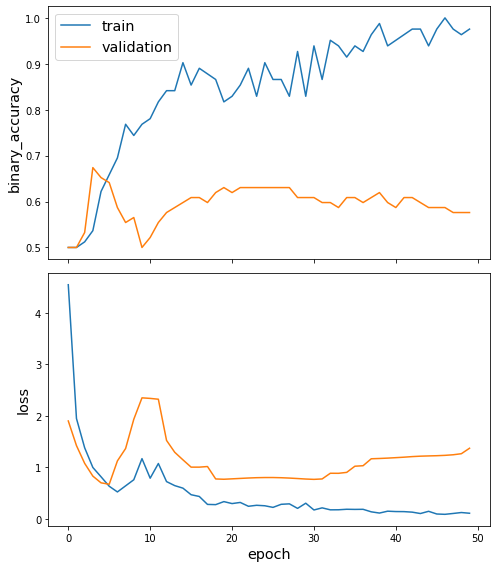

In [244]:
sg.utils.plot_history(history)

In [245]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 43ms/step - loss: 1.3691 - binary_accuracy: 0.5761

Train Set Metrics of the trained model:
	loss: 0.0488
	binary_accuracy: 0.9878

Test Set Metrics of the trained model:
	loss: 1.3691
	binary_accuracy: 0.5761


## Second method

### Functions and libraries

In [171]:
!pip install -q sentence-transformers

In [204]:
from sentence_transformers import SentenceTransformer

### Model.encode

In [206]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [223]:
feature_list = []
g_attr = KG.copy()

for node_id, node_feature in tqdm(g_attr.nodes(data=True)):
  feature_linguagem =  model.encode(node_id)
  feature_list.append(feature_linguagem)
  node_feature['embeddings'] = feature_linguagem

print('Último feature gerado:')
print('Node:',node_id)
print(feature_linguagem)

  0%|          | 0/613 [00:00<?, ?it/s]

Último feature gerado:
Node: connection
[-8.47614288e-01 -6.25339150e-01 -1.91788658e-01 -3.76146585e-02
 -3.51364523e-01 -6.67117313e-02 -9.98436511e-02 -3.63747329e-01
 -1.99813947e-01 -1.23189867e-01  8.67600441e-02  1.26950592e-02
  2.30023861e-01 -9.64300856e-02  3.11102122e-01 -4.61899256e-03
  1.83749795e-01  1.76438037e-02 -1.70182124e-01 -2.47229055e-01
 -2.54574627e-01 -3.46980423e-01 -2.98751622e-01 -2.41194904e-01
 -4.19240475e-01  9.70414802e-02  2.47098938e-01  5.48000038e-01
 -1.65654749e-01 -4.42439765e-01  2.94457495e-01 -9.87379849e-02
 -6.40134871e-01  4.96740639e-02  4.35875868e-03  4.30037118e-02
  2.95370549e-01 -2.53596693e-01 -7.58219063e-01 -3.31590146e-01
  4.64899063e-01  5.17681539e-01  1.35737941e-01 -2.31039718e-01
  2.77987272e-01  2.59842034e-02 -2.21805081e-01  5.91062456e-02
 -1.43519685e-01 -3.68342251e-01  1.16613708e-01  6.76764548e-01
 -7.04403222e-03  1.98548779e-01  1.66836921e-02  1.33222580e+00
 -1.35578424e-01  6.85988605e-01 -5.48825443e-01  

In [225]:
list(g_attr.nodes(data=True))[0]

('pictures',
 {'embeddings': array([-2.67976761e-01,  3.33682686e-01,  2.87213773e-01,  3.49369854e-01,
          4.52412993e-01,  2.11417839e-01,  4.16500956e-01,  8.54688063e-02,
          4.17735726e-01, -1.12989508e-01, -7.48503804e-02,  2.06179172e-02,
          4.66818184e-01,  1.38446540e-02, -5.76178074e-01,  8.50670114e-02,
          1.75763309e-01,  1.65467680e-01, -4.79465753e-01,  1.84456944e-01,
         -3.66263777e-01, -3.62785220e-01,  3.74950171e-01, -3.06625098e-01,
          3.18198204e-01,  1.90681711e-01, -4.38723594e-01,  2.45634481e-01,
         -3.05190772e-01, -1.08755648e+00,  6.54038563e-02, -1.73501328e-01,
         -1.06588922e-01,  1.41211271e-01,  6.70720816e-01,  4.38318133e-01,
         -4.16701317e-01,  3.50251108e-01, -1.39573470e-01,  2.94963807e-01,
         -3.41580771e-02, -2.27765560e-01,  1.12539940e-01,  7.19393417e-02,
         -3.27006765e-02,  5.30106910e-02, -2.31834099e-01, -3.78074020e-01,
          3.55878025e-01, -1.21215684e-02, -3.032

#### Exemplo de model.encode


In [218]:
# model.encode function example
embeddings = model.encode(text[:10])

#Print the embeddings
for sentence, embedding in zip(text[:10], embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: H
Embedding: 0.27898118

Sentence: o
Embedding: 0.6124044

Sentence: w
Embedding: 0.31718034

Sentence:  
Embedding: -0.75220454

Sentence: h
Embedding: -0.26389444

Sentence: a
Embedding: -0.23041952

Sentence: p
Embedding: 1.2730904

Sentence: p
Embedding: 0.39742166

Sentence: y
Embedding: -0.6623677

Sentence:  
Embedding: 0.33761176



In [220]:
print(len(embeddings))

384


### Creation of StellarGraph


In [228]:
G_emb = sg.StellarGraph.from_networkx(g_attr, node_features="embeddings")

In [229]:
print(G_emb.info())

StellarGraph: Undirected multigraph
 Nodes: 613, Edges: 461

 Node types:
  default: [613]
    Features: float32 vector, length 384
    Edge types: default-default->default

 Edge types:
    default-default->default: [461]
        Weights: all 1 (default)
        Features: none


### GCN implementation

In [246]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(G_emb)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=False, seed=42)

** Sampled 46 positive and 46 negative edges. **


In [247]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=False, seed=42
)

** Sampled 41 positive and 41 negative edges. **


In [248]:
epochs = 50

In [249]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [250]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [251]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.3
)

In [252]:
x_inp, x_out = gcn.in_out_tensors()

In [253]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

In [254]:
prediction = keras.layers.Reshape((-1,))(prediction)

In [255]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=["binary_accuracy"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [256]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 111ms/step - loss: 0.8298 - binary_accuracy: 0.5435

Train Set Metrics of the initial (untrained) model:
	loss: 0.9762
	binary_accuracy: 0.5854

Test Set Metrics of the initial (untrained) model:
	loss: 0.8298
	binary_accuracy: 0.5435


In [257]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/50
1/1 - 2s - loss: 0.8518 - binary_accuracy: 0.6220 - val_loss: 0.8020 - val_binary_accuracy: 0.5978 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 1.0375 - binary_accuracy: 0.7439 - val_loss: 1.0380 - val_binary_accuracy: 0.7391 - 122ms/epoch - 122ms/step
Epoch 3/50
1/1 - 0s - loss: 1.2681 - binary_accuracy: 0.7195 - val_loss: 0.8130 - val_binary_accuracy: 0.6196 - 131ms/epoch - 131ms/step
Epoch 4/50
1/1 - 0s - loss: 0.4969 - binary_accuracy: 0.7439 - val_loss: 0.9606 - val_binary_accuracy: 0.5870 - 119ms/epoch - 119ms/step
Epoch 5/50
1/1 - 0s - loss: 1.0216 - binary_accuracy: 0.6707 - val_loss: 0.9472 - val_binary_accuracy: 0.5870 - 102ms/epoch - 102ms/step
Epoch 6/50
1/1 - 0s - loss: 0.5516 - binary_accuracy: 0.6951 - val_loss: 0.8740 - val_binary_accuracy: 0.6196 - 108ms/epoch - 108ms/step
Epoch 7/50
1/1 - 0s - loss: 1.0771 - binary_accuracy: 0.7195 - val_loss: 0.9124 - val_binary_accuracy: 0.6413 - 109ms/epoch - 109ms/step
Epoch 8/50
1/1 - 0s - loss: 1.1271 - binary_acc

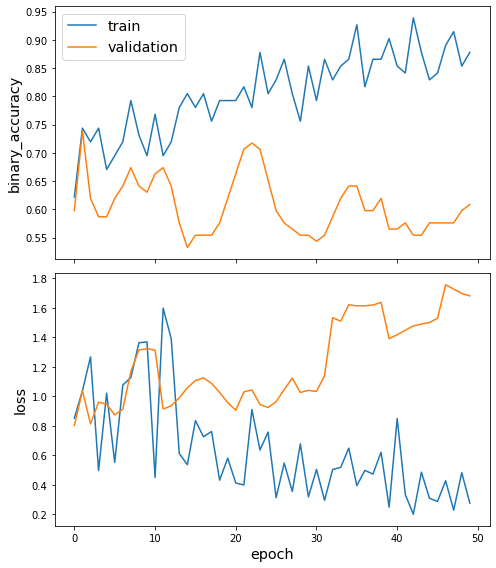

In [258]:
sg.utils.plot_history(history)

In [259]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 46ms/step - loss: 1.6818 - binary_accuracy: 0.6087

Train Set Metrics of the trained model:
	loss: 0.1694
	binary_accuracy: 0.9390

Test Set Metrics of the trained model:
	loss: 1.6818
	binary_accuracy: 0.6087
